# ДЗ №1 СУНЦ МГУ - Numpy practice

# New section

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

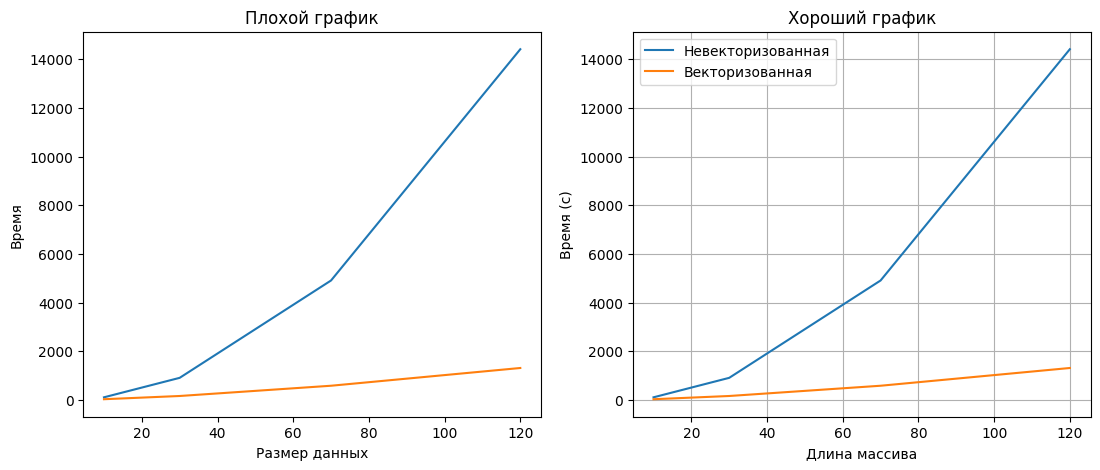

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib_inline
matplotlib_inline.backend_inline._enable_matplotlib_integration()


data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def prod_non_zero_diag(x) :
  res = 1
  n = min (len(x), len(x[0]))
  for i in range(n):
      if x[i][i] != 0:
        res *= x[i][i]
  return res

def prod_non_zero_diag_v(x):
    return np.prod(np.diag(x)[np.diag(x)!=0])

%matplotlib inline

sizes = [5000, 6000, 7000, 9000, 10000, 12000]
list_f = []
list_fv = []

for i in sizes:
    m = [[np.random.rand() for _ in range(i)] for __ in range(i)]
    m_np = np.array(m)

    start_f = time.time_ns()
    prod_non_zero_diag(m)
    end_f = time.time_ns()
    time_f = end_f - start_f
    list_f.append(time_f)

    start_fv = time.time_ns()
    prod_non_zero_diag_v(m_np)
    end_fv = time.time_ns()
    time_fv = end_fv - start_fv
    list_fv.append(time_fv)

prod_non_zero_diag, (ax) = plt.subplots(1, 1, figsize=(13, 5))
ax.plot(sizes, np.array(list_f), label=u"Невекторизованная")
ax.plot(sizes, np.array(list_fv), label=u"Векторизованная")
ax.set_title(u"График")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (нс)")
ax.grid()
ax.legend()



* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def are_multisets_equal(x, y):
    return sorted(x) == sorted(y)
def are_multisets_equal_v(x, y):
    return np.array_equal(np.sort(x), np.sort(y))

%matplotlib inline

sizes = [5000, 6000, 7000, 9000, 10000, 12000]
list_f = []
list_fv = []

for i in sizes:
    m = [np.random.randint(-1000000000, 1000000000) for _ in range(i)]
    m2 = [np.random.randint(-1000000000, 1000000000) for _ in range(i)]
    m_np = np.array(m)
    m_np2 = np.array(m2)

    start_f = time.time_ns()
    are_multisets_equal(m, m2)
    end_f = time.time_ns()
    time_f = end_f - start_f
    list_f.append(time_f)

    start_fv = time.time_ns()
    are_multisets_equal_v(m_np, m_np2)
    end_fv = time.time_ns()
    time_fv = end_fv - start_fv
    list_fv.append(time_fv)

are_multisets_equal, (ax) = plt.subplots(1, 1, figsize=(13, 5))
ax.plot(sizes, np.array(list_f), label=u"Невекторизованная")
ax.plot(sizes, np.array(list_fv), label=u"Векторизованная")
ax.set_title(u"График")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (нс)")
ax.grid()
ax.legend()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

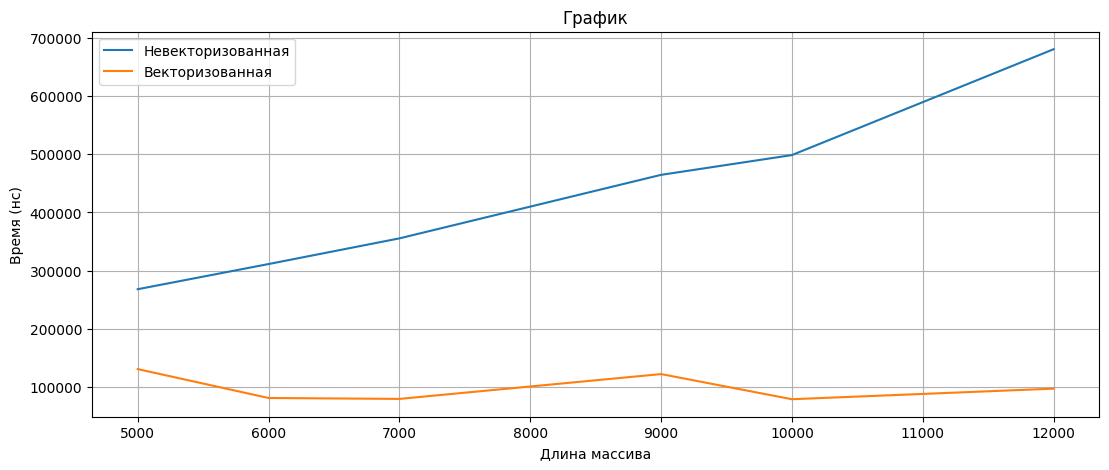

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def max_after_zero(x):
    ind = -1
    for i in range(len(x) - 1):
        if x[i] == 0 and (ind == -1 or x[i + 1] > x[ind]):
            ind = i + 1
    if ind == -1:
        return -1
    return x[ind]

def max_after_zero_v(x):
    return np.max(x[1:][np.nonzero(x[:-1] == 0)])

%matplotlib inline

sizes = [5000, 6000, 7000, 9000, 10000, 12000]
list_f = []
list_fv = []

for i in sizes:
    m = [np.random.randint(-100, 100) for _ in range(i)]
    m_np = np.array(m)

    start_f = time.time_ns()
    max_after_zero(m)
    end_f = time.time_ns()
    time_f = end_f - start_f
    list_f.append(time_f)

    start_fv = time.time_ns()
    max_after_zero_v(m_np)
    end_fv = time.time_ns()
    time_fv = end_fv - start_fv
    list_fv.append(time_fv)

max_after_zero, (ax) = plt.subplots(1, 1, figsize=(13, 5))
ax.plot(sizes, np.array(list_f), label=u"Невекторизованная")
ax.plot(sizes, np.array(list_fv), label=u"Векторизованная")
ax.set_title(u"График")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (нс)")
ax.grid()
ax.legend()



* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import imageio.v2 as imageio
coefs = np.array([0.299, 0.587, 0.114])

def convert_image(img, coefs):
    m = []
    for i in range(len(img)):
        m.append([])
        for j in range(len(img[i])):
            m[-1].append(img[i][j][0] * coefs[0] +
                     img[i][j][1] * coefs[1] +
                     img[i][j][2] * coefs[2])
    return m


def convert_image_vect(img, coefs):
    return np.dot(img, coefs)



image1_np = imageio.imread('image.jpg')
image1 = image1_np.tolist()

start_f = time.time_ns()
image2 = convert_image(image1, coefs)
end_f = time.time_ns()

start_fv = time.time_ns()
image3 = convert_image_vect(image1_np, coefs)
end_fv = time.time_ns()

print("non-vect:".format(end_f - start_f))
print("vect:".format(end_fv - start_fv))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
img1 = Image.open("image.jpg")
ax1.imshow(img1)
img2 = Image.fromarray(np.array(image2))
ax2.imshow(img2)

FileNotFoundError: No such file: '/content/image.jpg'

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [ ]:
# code here



* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [ ]:
# code here

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

In [ ]:
# code here